# Y E A S T

### 'fine replicates' and their consistency 

In [1]:
import pandas as pd
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300

In [2]:
# basic bayexpress functions

from bayexpress_functions import get_BF_21, get_FC, get_q, get_BF_k1

# setting the priors to flat prios
u_1 = 1
u_2 = 1


### CONSISTENCY TESTS

In [3]:
WT_yeast = pd.read_csv('WT_yeast.csv', index_col=0)
Snf2_yeast = pd.read_csv('Snf2_yeast.csv', index_col=0)

display(WT_yeast)
display(Snf2_yeast)

,genes,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,15S_rRNA,2,12,31,8,21,11,2,3,7,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
2,HRA1,3,2,2,2,3,5,4,0,4,...,5,3,6,5,2,2,2,5,2,1
3,ICR1,75,123,107,157,98,245,119,120,119,...,85,177,137,118,113,81,142,94,187,106
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7122,tY(GUA)M1,0,0,1,1,1,1,0,0,1,...,0,1,1,0,1,0,0,0,1,0
7123,tY(GUA)M2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


,genes,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,15S_rRNA,4,2,5,5,46,5,4,2,40,...,7,15,6,1,85,8,34,3,6,3
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
2,HRA1,5,1,3,1,2,1,4,4,0,...,5,5,0,2,0,1,2,2,0,1
3,ICR1,205,196,211,252,127,275,160,190,146,...,286,155,184,164,202,186,148,183,195,145
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,2,1,1
7122,tY(GUA)M1,0,0,1,0,2,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
7123,tY(GUA)M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [4]:
# exploring 'cumulative' BF_k1

def get_cumu_BF_k1(data):
    out_data = pd.DataFrame({})
    for k in range(3,len(data.columns)+1):

        evidence2 = np.full(len(data), 0)

        # iterating over j until k
        for col in data.columns[1:k]: 
            n_j = data[col]
            # print(n_j, 'n_j')
            N_j = sum(data[col])
            # print(N_j, 'N_j')
            evidence2 = evidence2 + sc.betaln(u_1 + n_j, u_2 + N_j - n_j)

        N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))
        n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)

        # print(n_i, 'n_i')
        # print(N, 'N')

        evidence1 = sc.betaln( u_1 + n_i, u_2 + N - n_i)
        
        out_data[f'{k-1}'] = (evidence2 - evidence1) / np.log(10) 

    return out_data

In [5]:
# calculating 'cumulatative' BF_k1

WT_cumu = get_cumu_BF_k1(WT_yeast)

display(WT_cumu)

Snf2_cumu = get_cumu_BF_k1(Snf2_yeast)


display(Snf2_cumu)

,2,3,4,5,6,7,8,9,10,11,...,33,34,35,36,37,38,39,40,41,42
0,-4.824123,-4.912829,-8.839685,-14.117564,-17.996641,-21.086076,-24.943705,-30.693142,-36.473404,-36.748828,...,-78.392957,-79.236264,-83.873072,-87.899103,-93.755645,-99.564530,-98.737339,-102.165373,-107.111094,-111.028167
1,-0.963656,0.632576,-4.889390,-5.707717,-1.756501,-1.034256,1.474677,-3.694451,-4.328017,30.503034,...,314.603331,332.522436,337.316054,341.359343,335.890120,333.215257,356.876602,375.089399,370.679089,365.965229
2,-5.943931,-12.083265,-18.278537,-24.465218,-30.802653,-36.940374,-42.530537,-48.629171,-54.649860,-60.521649,...,-192.140921,-198.484739,-204.355581,-210.085429,-216.320230,-222.587706,-228.790003,-234.076721,-240.250222,-246.380070
3,-4.823112,-9.807353,-15.238338,-19.905392,-24.625241,-29.785183,-34.360645,-39.709611,-44.590227,-49.889550,...,-155.375929,-160.782614,-166.296698,-171.236715,-175.771447,-179.030847,-184.072077,-188.751188,-193.899154,-199.310861
4,0.108211,10.803119,9.032746,4.700363,1.487643,-3.873543,11.533645,7.137768,1.803757,6.654632,...,249.996802,253.183338,247.773924,242.971550,239.948338,250.582110,269.366427,264.188637,259.247720,257.043307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,-6.286567,-12.763830,-19.421876,-26.124338,-32.363821,-39.044382,-45.782284,-52.528131,-59.264657,-65.422555,...,-215.130801,-222.115884,-229.041179,-235.853189,-242.628019,-249.481368,-256.468048,-263.178684,-270.184691,-277.038617
7122,-6.531056,-12.675472,-19.165382,-25.559965,-32.208462,-38.822300,-45.496440,-51.930123,-58.585525,-65.225674,...,-209.970841,-216.538875,-223.000753,-229.707786,-235.891374,-242.622613,-249.440170,-256.071351,-262.651404,-269.387754
7123,-6.531056,-12.675472,-19.333519,-26.035980,-32.922786,-39.191373,-45.993039,-52.789226,-59.566314,-66.302507,...,-215.904536,-222.907910,-229.847933,-236.670440,-243.454560,-250.319009,-257.321064,-264.038923,-271.060168,-277.923892
7124,-6.531056,-13.174062,-20.012232,-26.815334,-33.841214,-39.875493,-46.740922,-53.587450,-60.405100,-67.173308,...,-217.027288,-224.048953,-230.003826,-236.826334,-243.610453,-250.474902,-257.476958,-264.194816,-271.216061,-277.030310


,2,3,4,5,6,7,8,9,10,11,...,35,36,37,38,39,40,41,42,43,44
0,-6.103991,-12.057457,-18.248233,-0.689254,-4.779452,-10.148008,-14.380417,-8.405656,-13.822875,-19.135557,...,58.990171,53.171198,50.286105,48.540940,67.204146,63.100998,59.969102,58.492922,55.074698,52.273279
1,-5.373082,-11.152096,-15.709169,164.012305,176.098447,175.473667,187.389002,199.129378,194.351127,194.767768,...,804.627349,799.728536,799.019121,811.207678,1011.496083,1014.180313,1037.861715,1054.538366,1059.645076,1068.603540
2,-5.776665,-11.988302,-18.045738,-24.279166,-30.448821,-36.302987,-42.457222,-48.388459,-54.694911,-60.979764,...,-209.316343,-214.850561,-220.739455,-226.997613,-232.939793,-239.278730,-245.600999,-251.971431,-257.999634,-264.347894
3,-4.971297,-9.804811,-14.992280,-19.330740,-24.753763,-29.744215,-34.505353,-38.882697,-44.050455,-49.311961,...,-155.746721,-161.075340,-166.370178,-170.515722,-175.754308,-181.035691,-186.357233,-191.677668,-196.533408,-201.913097
4,-0.576562,-5.754128,-6.633886,15.230201,10.031782,15.283111,17.306187,20.515392,18.416235,13.685228,...,321.437539,316.081994,316.897201,329.751911,485.680806,480.472207,476.587686,482.279438,477.098099,473.797677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,-6.404911,-13.017210,-19.762178,-26.456642,-33.341253,-39.530966,-46.347490,-53.129063,-59.979981,-66.750607,...,-230.114841,-236.079392,-242.999319,-249.784977,-256.694193,-263.577612,-270.417138,-275.356707,-281.477286,-287.490152
7122,-6.672068,-12.950527,-19.695495,-25.231652,-31.904670,-38.586324,-45.341319,-52.078137,-58.880708,-65.618429,...,-222.528536,-228.875641,-235.353807,-242.033736,-248.799687,-255.553666,-262.281139,-269.041926,-275.805506,-282.046301
7123,-6.672068,-13.449795,-20.336202,-27.102349,-34.092758,-40.946441,-47.886024,-54.757106,-61.704721,-67.404270,...,-229.953348,-236.815191,-243.748169,-250.542638,-257.463792,-264.357998,-271.206862,-278.100616,-284.993383,-291.816655
7124,-6.334297,-12.946597,-19.691564,-26.386028,-33.270640,-40.066980,-46.945034,-53.063258,-59.914177,-66.684802,...,-228.743133,-234.775721,-241.682596,-248.459444,-255.356721,-262.229353,-269.059542,-275.932839,-282.805731,-289.612759


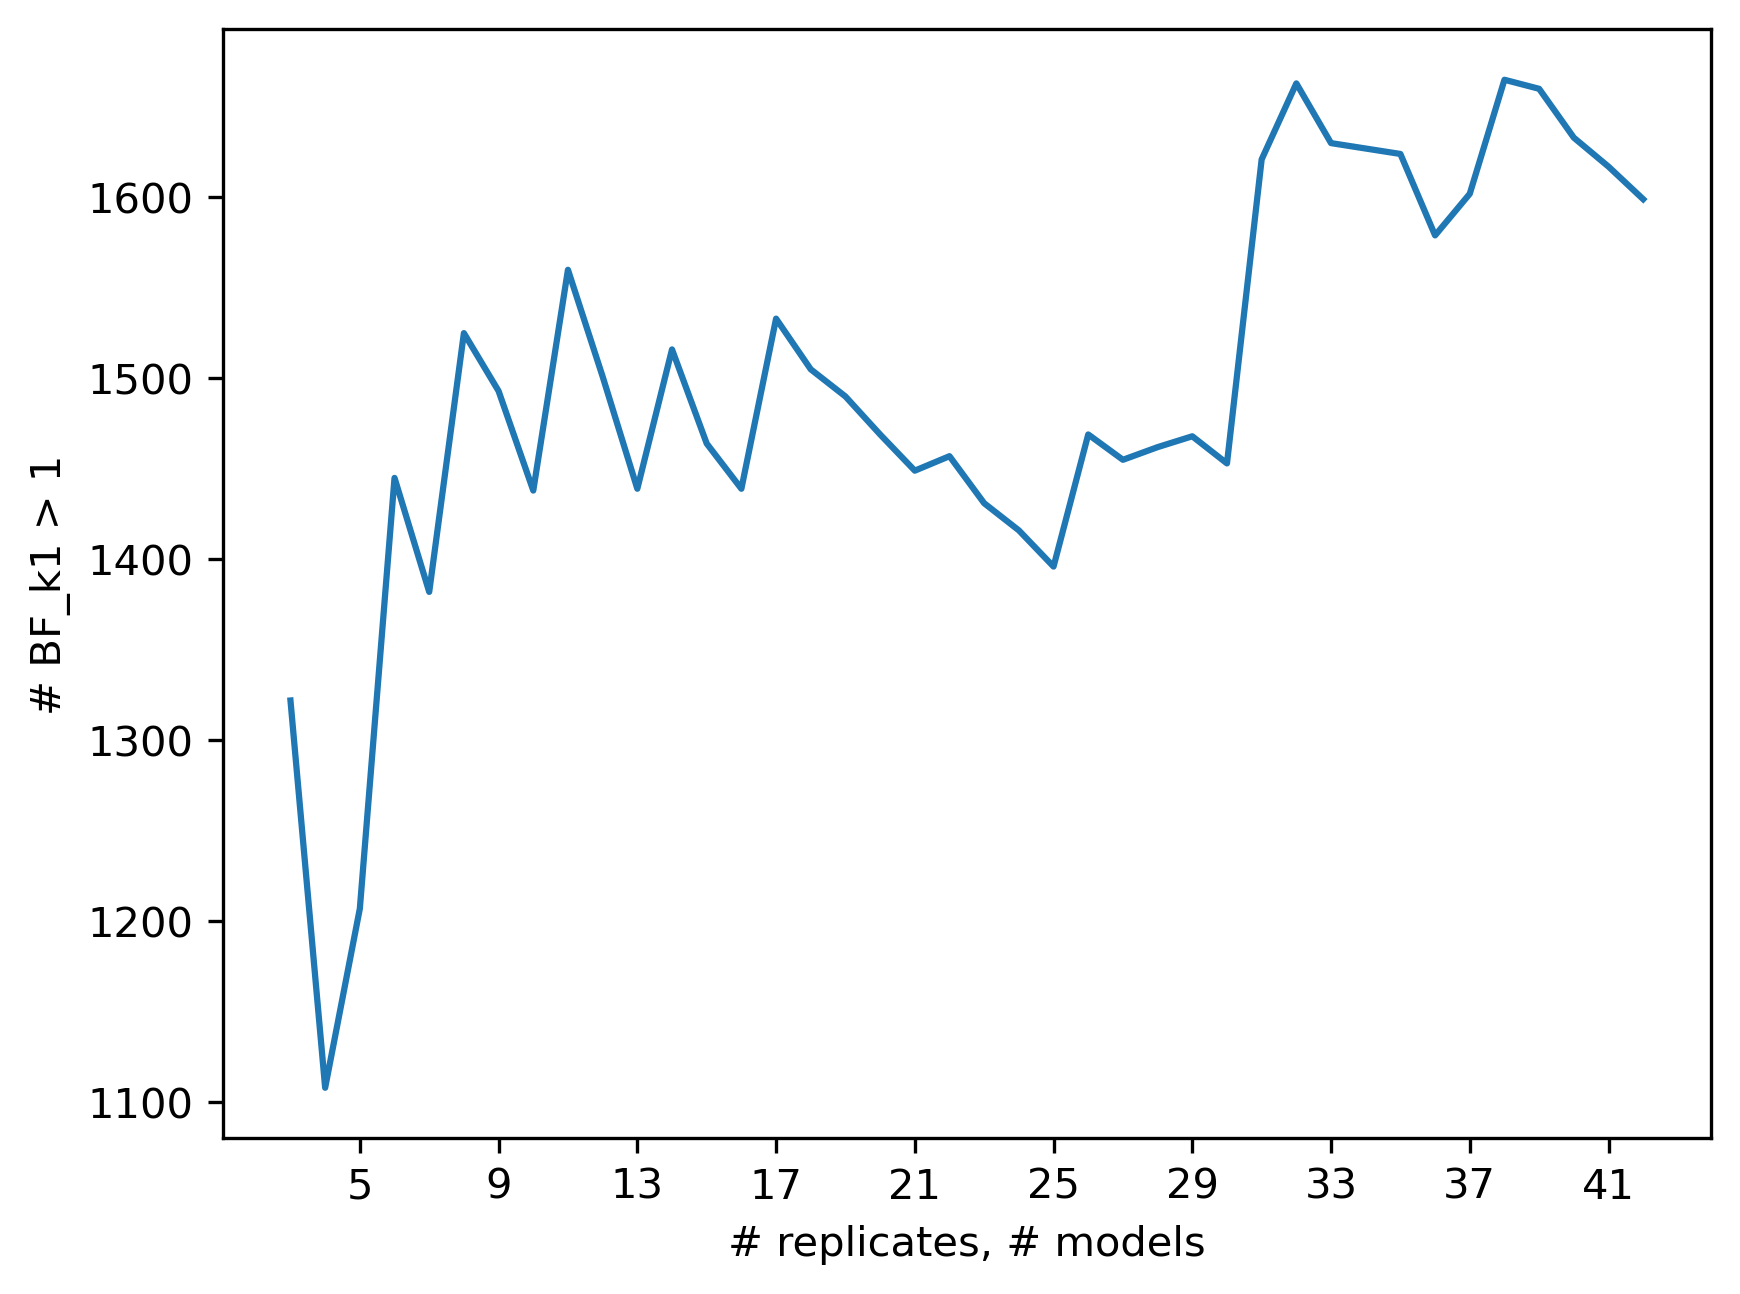

In [6]:
# this is the general idea

# finding the number of genes with BF_k1 > 1 while increasing number of reps
series = (WT_cumu.iloc[:,1:] > 1).sum()

series.plot(xlabel='# replicates, # models', ylabel='# BF_k1 > 1', xticks=range(2,len(series),4), legend=False)


plt.show()

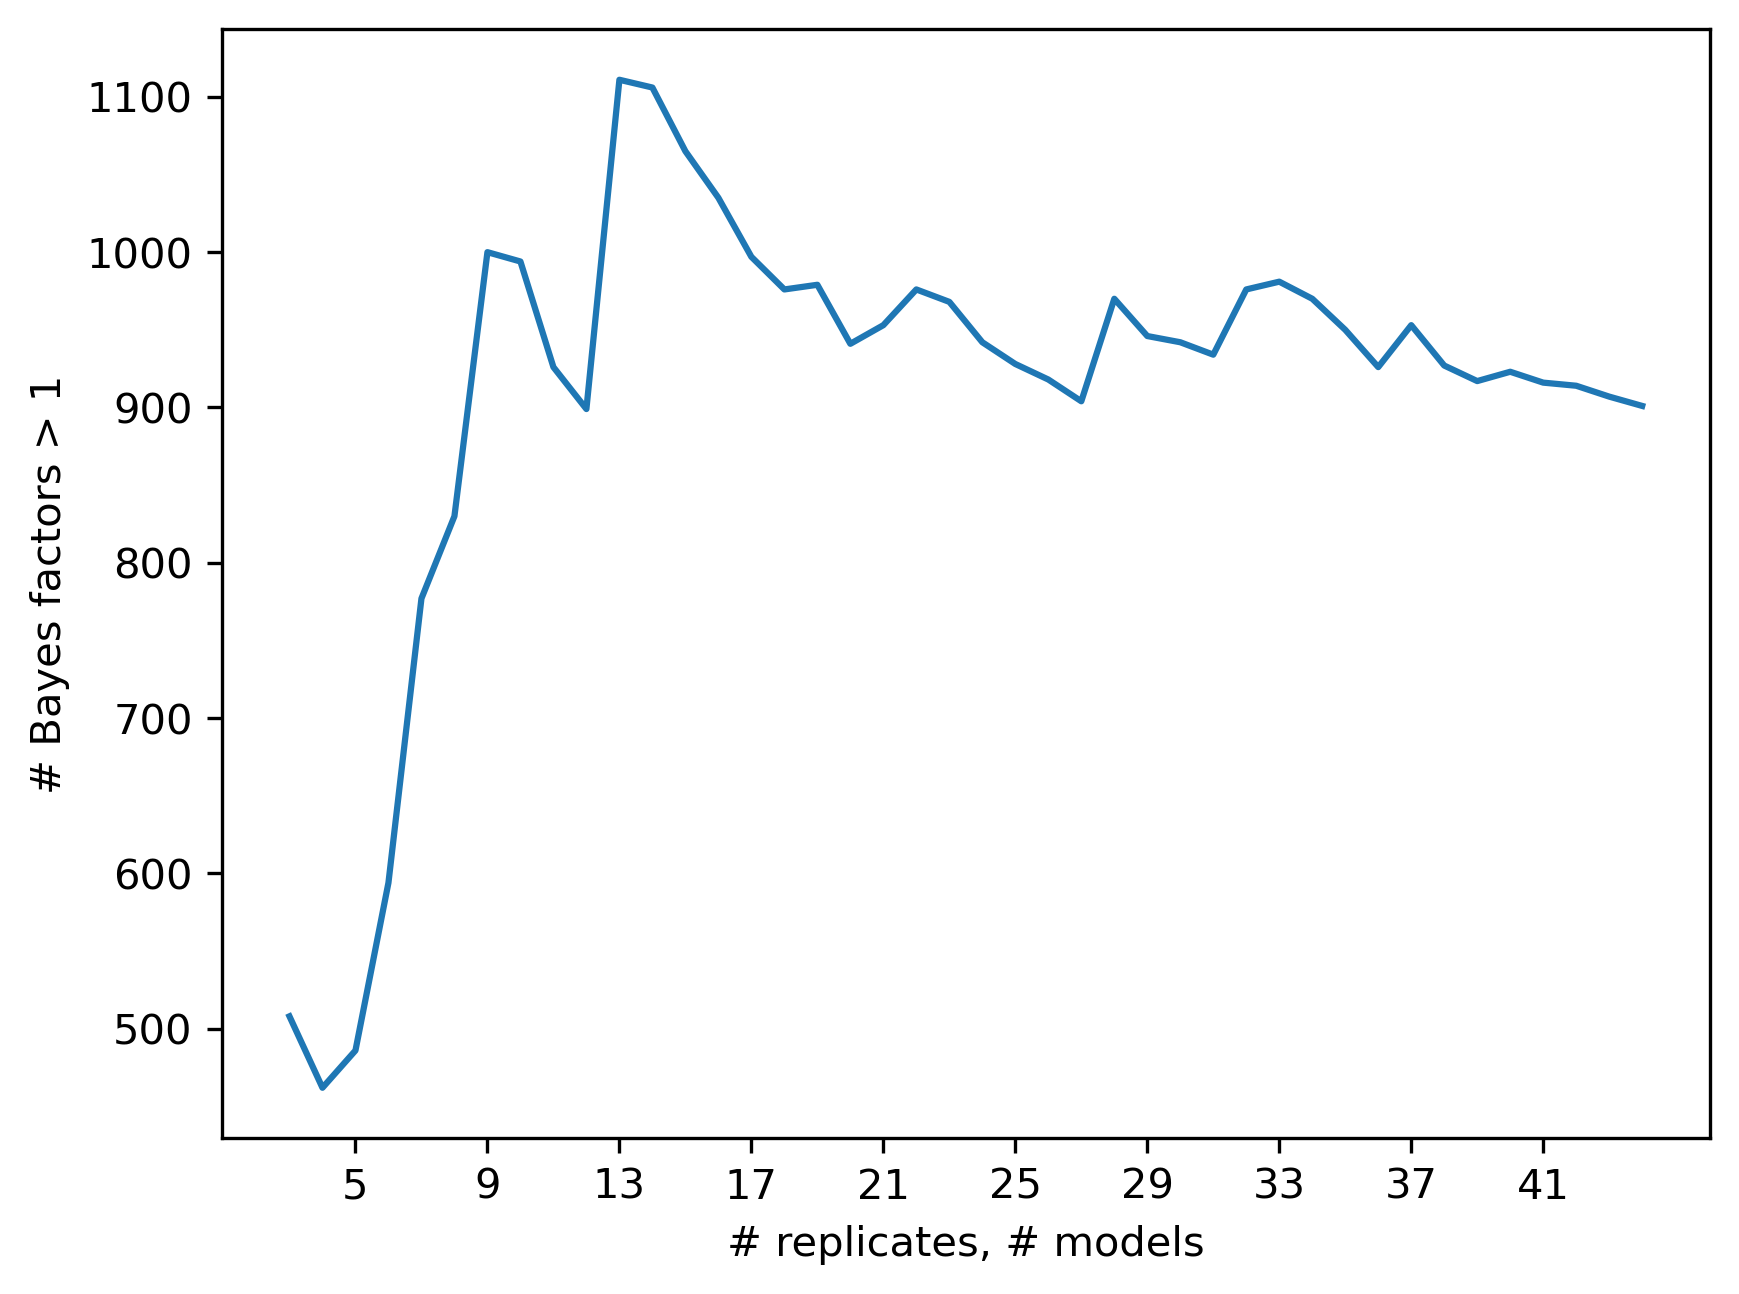

In [7]:
# this is the general idea

# finding the number of genes with BF_k1 > 1 while increasing number of reps
series = (Snf2_cumu.iloc[:,1:] > 1).sum()


series.plot(xlabel='# replicates, # models', ylabel='# Bayes factors > 1', xticks=range(2,len(series),4), legend=False)

plt.show()

In [8]:
# then bootstrapping this idea
# 20 times for figure

WT_cons_it_20 = pd.DataFrame({})
# let's do this with more iterations
# Which genes are consistently inconsistent (CIG) in the wild-type?
# WT_CIG = []

for i in range(20):

    col_order = np.array(WT_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF_k1(WT_yeast[col_order])
    # Which genes are consistently inconsistent (CIG) in the wild-type?
    # WT_CIG.append(WT_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    WT_cons_it_20[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(WT_cons_it_20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2,1477,729,1815,437,1139,1684,1087,1639,2469,1584,1684,1002,428,471,1258,1651,1084,327,1180,446
3,1649,737,2474,426,905,1420,1222,1572,1749,1479,1823,842,1544,897,1210,1641,949,1119,846,326
4,1419,1268,2044,623,1162,1663,1454,1374,2132,1715,1984,1764,1686,872,1321,1396,1108,1708,726,503
5,2688,2167,2506,497,1220,1527,1608,1347,1887,1807,1872,1724,1442,941,1279,1302,1019,1875,691,1700
6,2523,1909,2498,1227,1132,1491,1809,1304,1675,1682,1836,1808,1340,1423,1300,1252,1098,1834,1679,1545
7,2342,1900,2253,1124,1214,1620,1662,1252,1743,1744,1765,1797,1370,1483,1550,1252,1043,2008,1894,1690
8,2333,1877,2106,1063,1120,1532,1518,1177,1811,1733,1645,1681,1334,1490,1444,1185,1213,2024,1830,1725
9,2390,1915,2054,1020,1094,1719,1459,1175,1930,1708,1573,1840,1343,1386,1654,1379,1244,1867,1842,1643
10,2371,1868,1989,1194,1079,1634,1556,1150,1864,1624,1496,1829,1620,1429,1574,1406,1369,1830,2290,1669
11,2250,1839,1906,1276,1117,1579,1642,1242,1821,1629,1558,1926,1692,1357,1518,1707,1361,1987,2160,1637


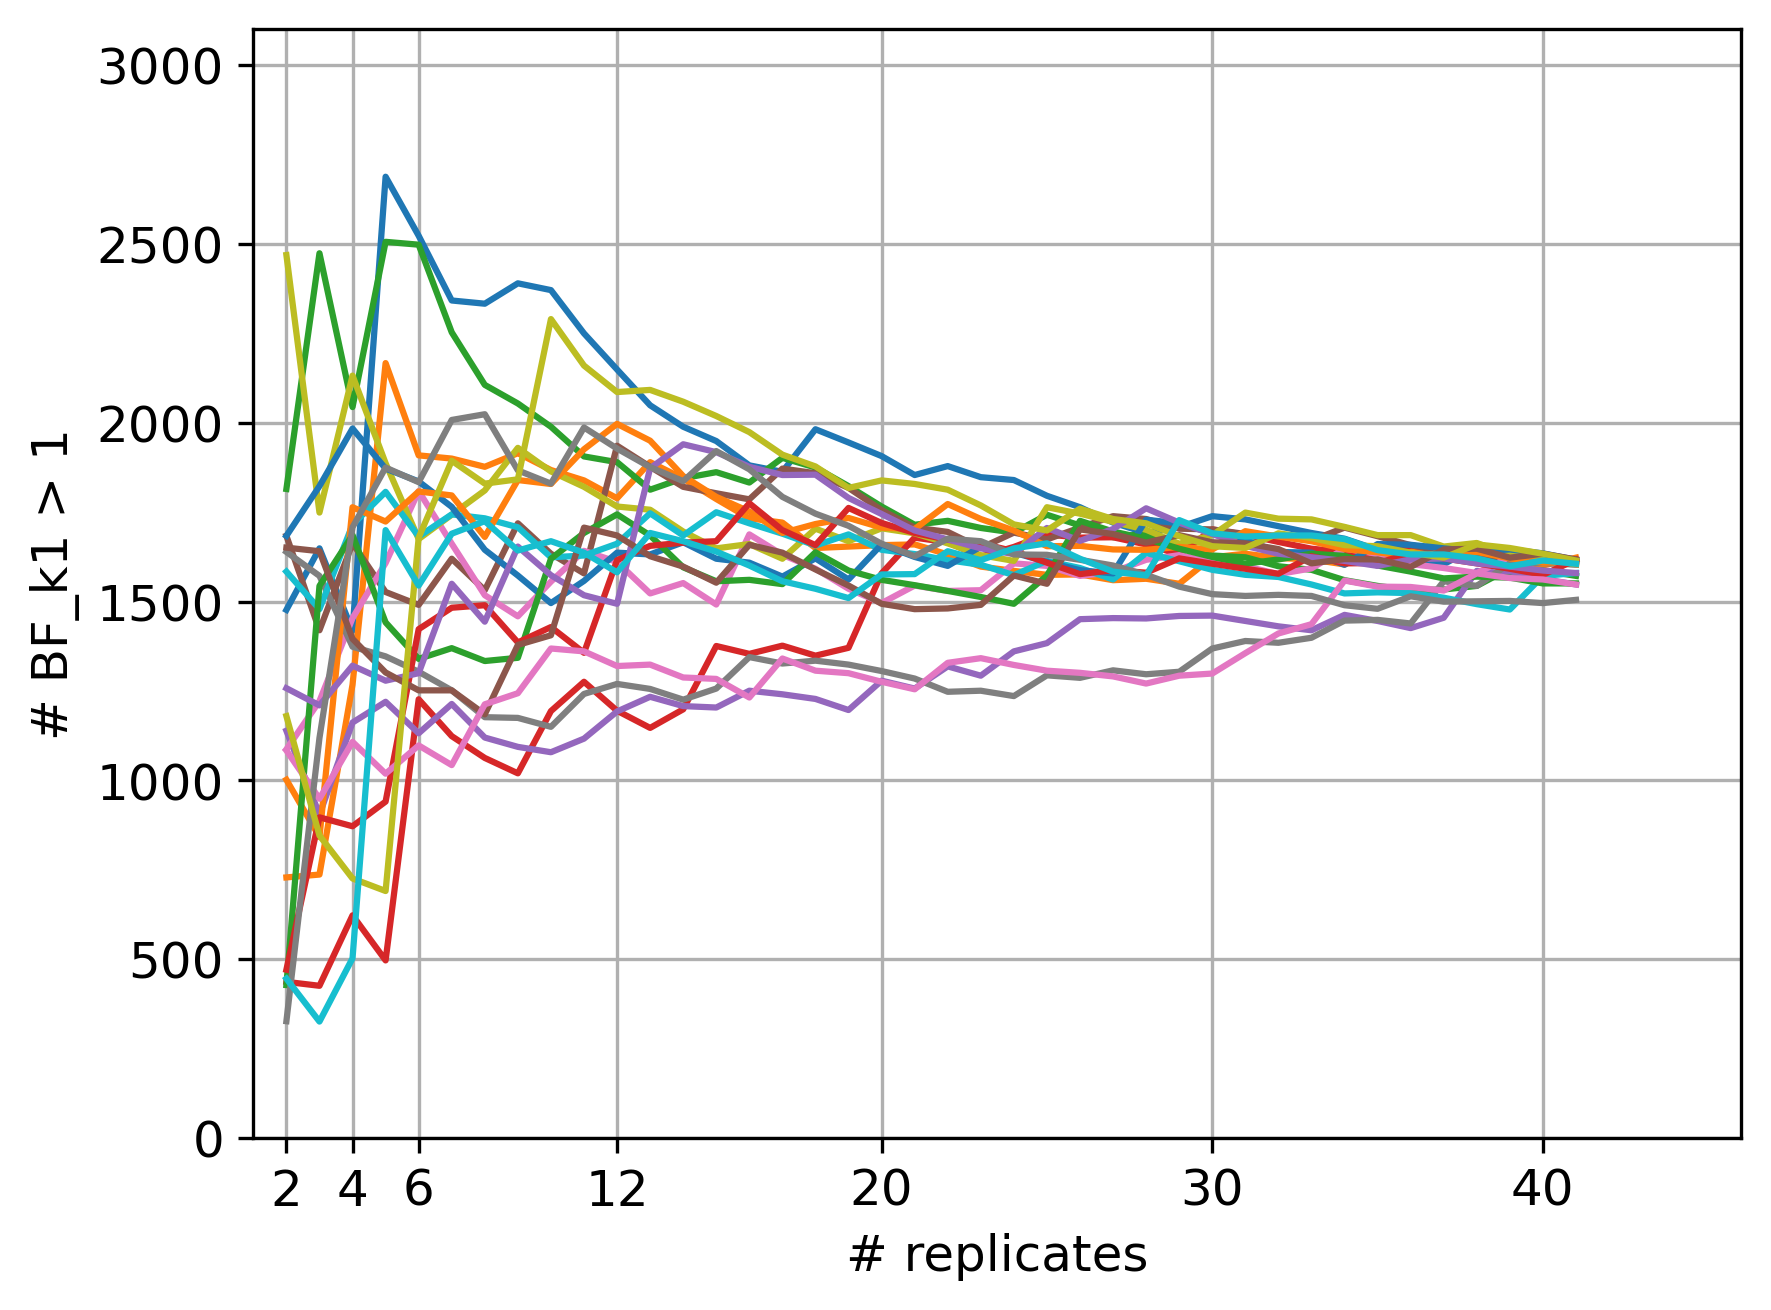

In [9]:
# Create the plot
ax = WT_cons_it_20.plot(legend=False, grid=True,
                      xlabel='# replicates',
                      ylabel='# BF_k1 > 1', fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [10]:
# then bootstrapping this idea
# 100 times for identifying genes

WT_cons_it = pd.DataFrame({})
# Which genes are consistently inconsistent (CIG) in the wild-type?
WT_CIG = []

for i in range(100):

    col_order = np.array(WT_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF_k1(WT_yeast[col_order])
    # Which genes are consistently inconsistent (CIG) in the wild-type?
    WT_CIG.append(WT_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    WT_cons_it[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(WT_cons_it)


,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
2,1747,317,432,859,54,992,1455,707,823,372,...,692,1517,1815,231,502,1942,583,349,860,128
3,1492,990,1568,767,1315,1408,1192,1345,2029,985,...,1537,1538,1501,771,2317,1677,923,1507,682,2227
4,1474,1296,1531,948,1241,1439,1722,1459,1902,855,...,2105,1447,1513,776,2159,1704,1751,1384,1277,2556
5,1348,1231,1464,893,1166,1603,1480,1610,1711,987,...,1807,1317,1406,2152,2082,1608,1659,1267,1239,2311
6,1343,1258,1470,1177,1130,1790,1592,1630,1638,965,...,1584,1264,1267,2005,1835,1597,1512,1264,1292,2222
7,1248,1283,1405,1228,1047,1985,1415,1611,1976,1014,...,1470,1247,1236,2293,1650,1520,1479,1223,1204,2060
8,1282,1335,1460,1307,1017,1873,1543,1554,1867,987,...,2221,1313,1182,2160,1713,1440,1379,1276,1206,1900
9,1313,1286,1457,1424,1020,1763,1631,1669,1893,1018,...,2056,1233,1229,2047,1731,1416,1361,1499,1207,1823
10,1222,1603,1508,1343,1047,2020,1563,1595,1885,1085,...,2084,1204,1196,2029,1693,1439,1298,1816,1187,1740
11,1341,1556,1453,1460,1239,1933,1507,1705,1920,1089,...,1966,1336,1195,1969,1672,1398,1344,1761,1291,1743


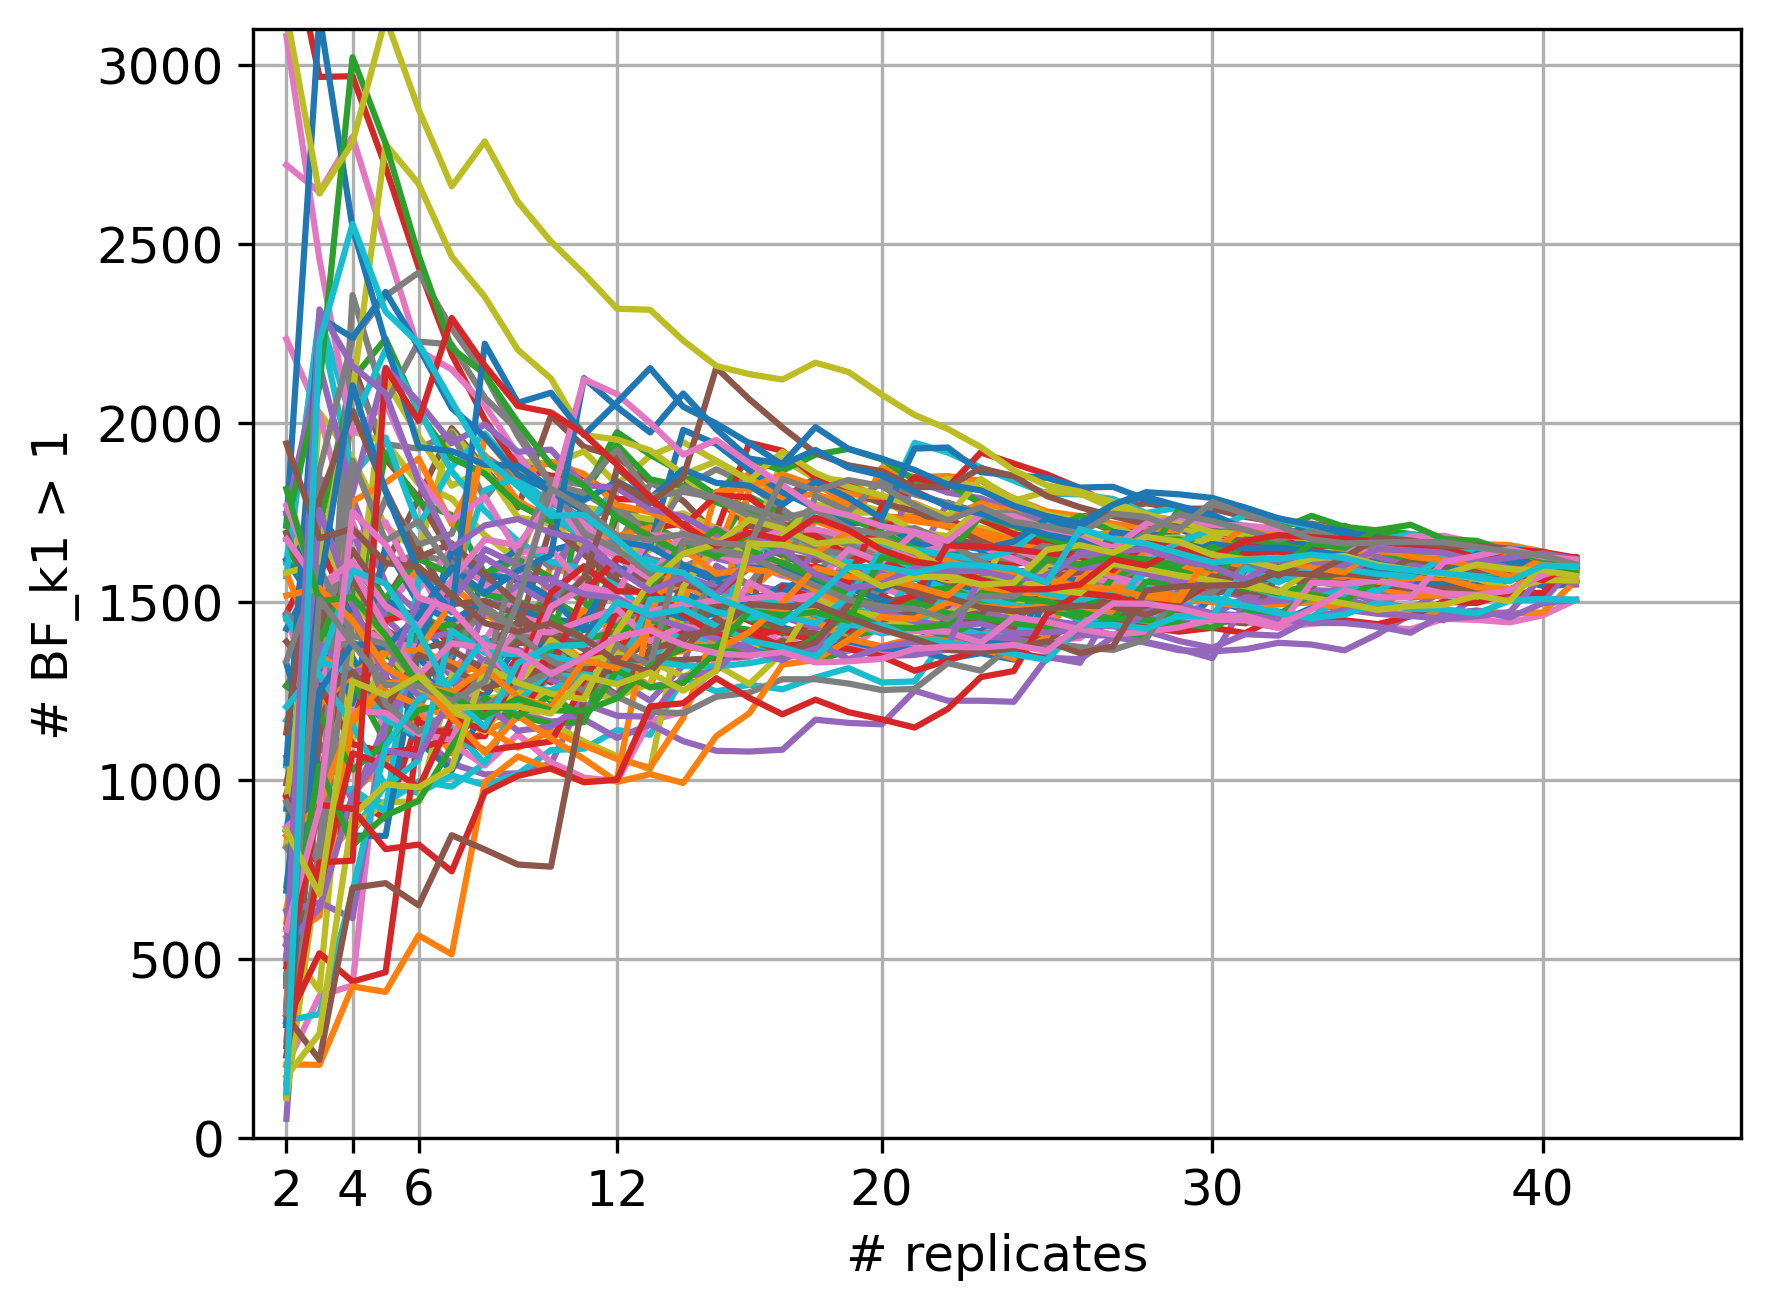

In [11]:

# Create the plot
ax = WT_cons_it.plot(legend=False, grid=True,
                      xlabel='# replicates',
                      ylabel='# BF_k1 > 1',fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [12]:
# again, bootstrapping this idea but on the mutant

Snf2_cons_it_20 = pd.DataFrame({})
# Which genes are consistently inconsistent (CIG) in the mutant?
# Snf2_CIG = []

for i in range(20):

    col_order = np.array(Snf2_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF_k1(Snf2_yeast[col_order])
    # Snf2_CIG.append(Snf2_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    Snf2_cons_it_20[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(Snf2_cons_it_20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
2,410,552,1641,302,330,810,290,361,313,487,563,591,1288,290,903,698,340,825,1110,1211
3,567,892,1602,345,671,1248,268,451,282,560,628,723,1278,313,740,594,734,677,2186,1981
4,545,770,1240,488,753,887,920,851,470,506,1364,726,1038,641,804,554,1306,1122,2023,1649
5,572,649,1326,474,780,814,900,1438,479,874,1138,1061,1009,578,712,498,1405,916,1887,1528
6,622,622,1408,635,850,879,889,1250,588,802,1024,935,928,530,752,635,1425,788,1855,1309
7,805,629,1189,581,874,944,828,1189,561,726,901,873,834,979,722,637,1276,858,1811,1296
8,799,614,1016,606,881,1041,828,1090,632,750,864,942,761,1019,685,646,1160,1130,1598,1185
9,829,578,932,681,1129,1021,1008,1168,829,723,813,876,770,974,670,724,1085,1047,1536,1075
10,813,636,1096,876,1161,936,1083,1215,744,707,807,820,719,1041,649,730,1011,978,1401,1028
11,884,847,1103,815,1123,895,1034,1162,970,688,862,1053,714,997,970,720,935,902,1370,954


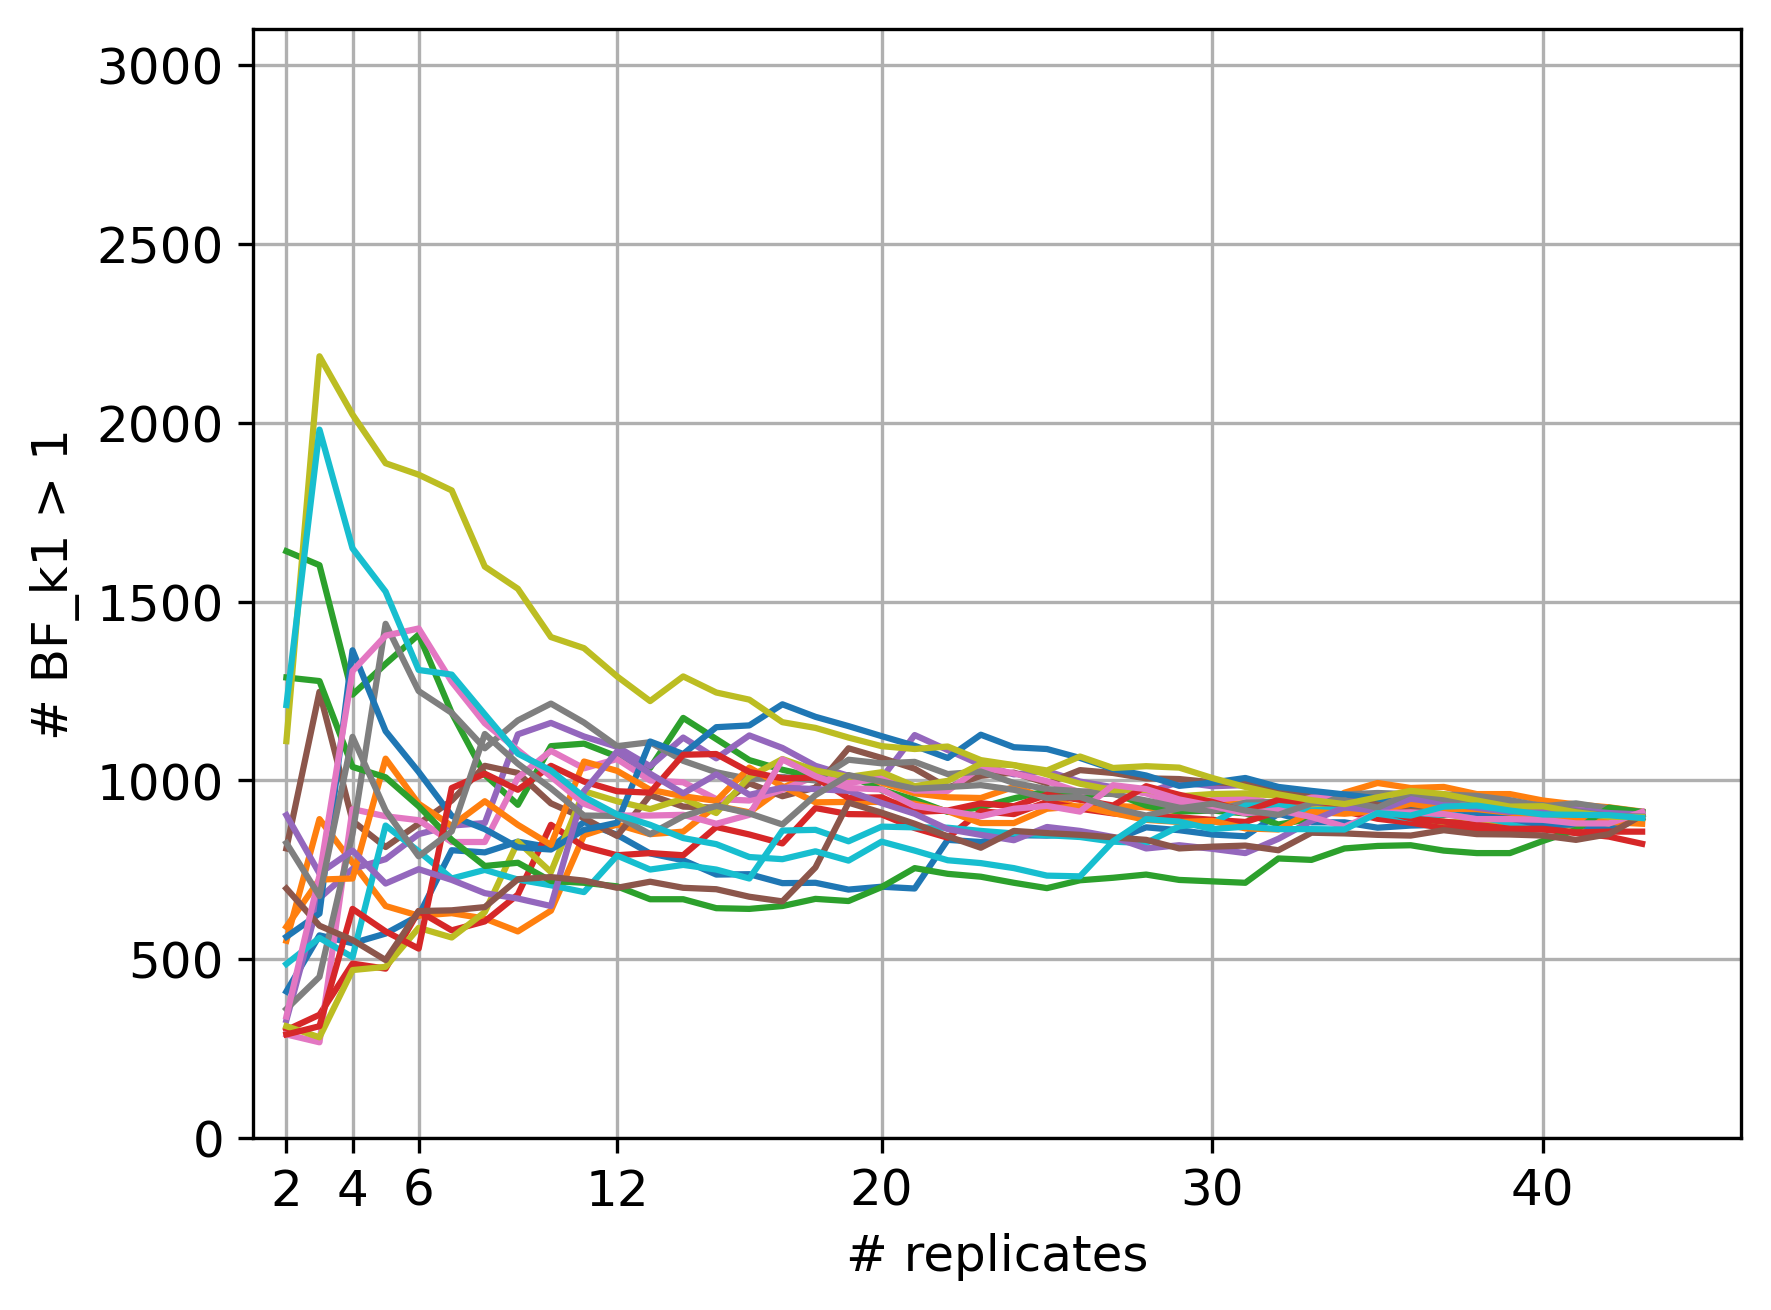

In [13]:

# Create the plot
ax = Snf2_cons_it_20.plot(legend=False, grid=True, fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [14]:
# again, bootstrapping this idea but on the mutant

Snf2_cons_it = pd.DataFrame({})
Snf2_CIG = []

for i in range(100):

    col_order = np.array(Snf2_yeast.columns[1:])
    np.random.shuffle(col_order)
    # print(col_order)

    cumu_BF_k1 = get_cumu_BF_k1(Snf2_yeast[col_order])
    Snf2_CIG.append(Snf2_yeast.loc[(cumu_BF_k1).iloc[:,-1] > 1].index)

    Snf2_cons_it[f'{i+1}'] = ((cumu_BF_k1) > 1).sum()

# Display the DataFrame
display(Snf2_cons_it)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
2,591,457,458,501,819,637,288,248,480,1836,...,315,699,991,327,326,310,527,1444,373,287
3,443,561,522,896,762,501,967,570,674,1396,...,571,753,1027,725,546,581,840,1621,345,460
4,363,473,975,570,692,467,789,477,668,1113,...,561,595,809,841,450,927,1256,1786,475,698
5,565,474,890,698,629,425,641,525,618,983,...,618,871,698,1393,438,773,980,1529,555,655
6,940,501,765,737,795,456,660,720,894,859,...,773,798,737,1477,452,831,905,1617,551,584
7,840,510,908,874,772,459,905,715,845,862,...,699,747,749,1265,481,1012,831,1566,570,609
8,761,494,1088,940,727,507,850,645,770,792,...,691,956,891,1145,522,949,1093,1515,552,581
9,775,580,1027,901,696,502,813,649,799,789,...,739,984,914,1073,532,927,1051,1400,524,592
10,713,640,1004,835,778,535,893,670,994,908,...,742,933,899,1205,539,915,1061,1364,511,608
11,681,833,929,996,767,683,844,667,923,996,...,750,890,956,1140,572,983,1228,1256,503,568


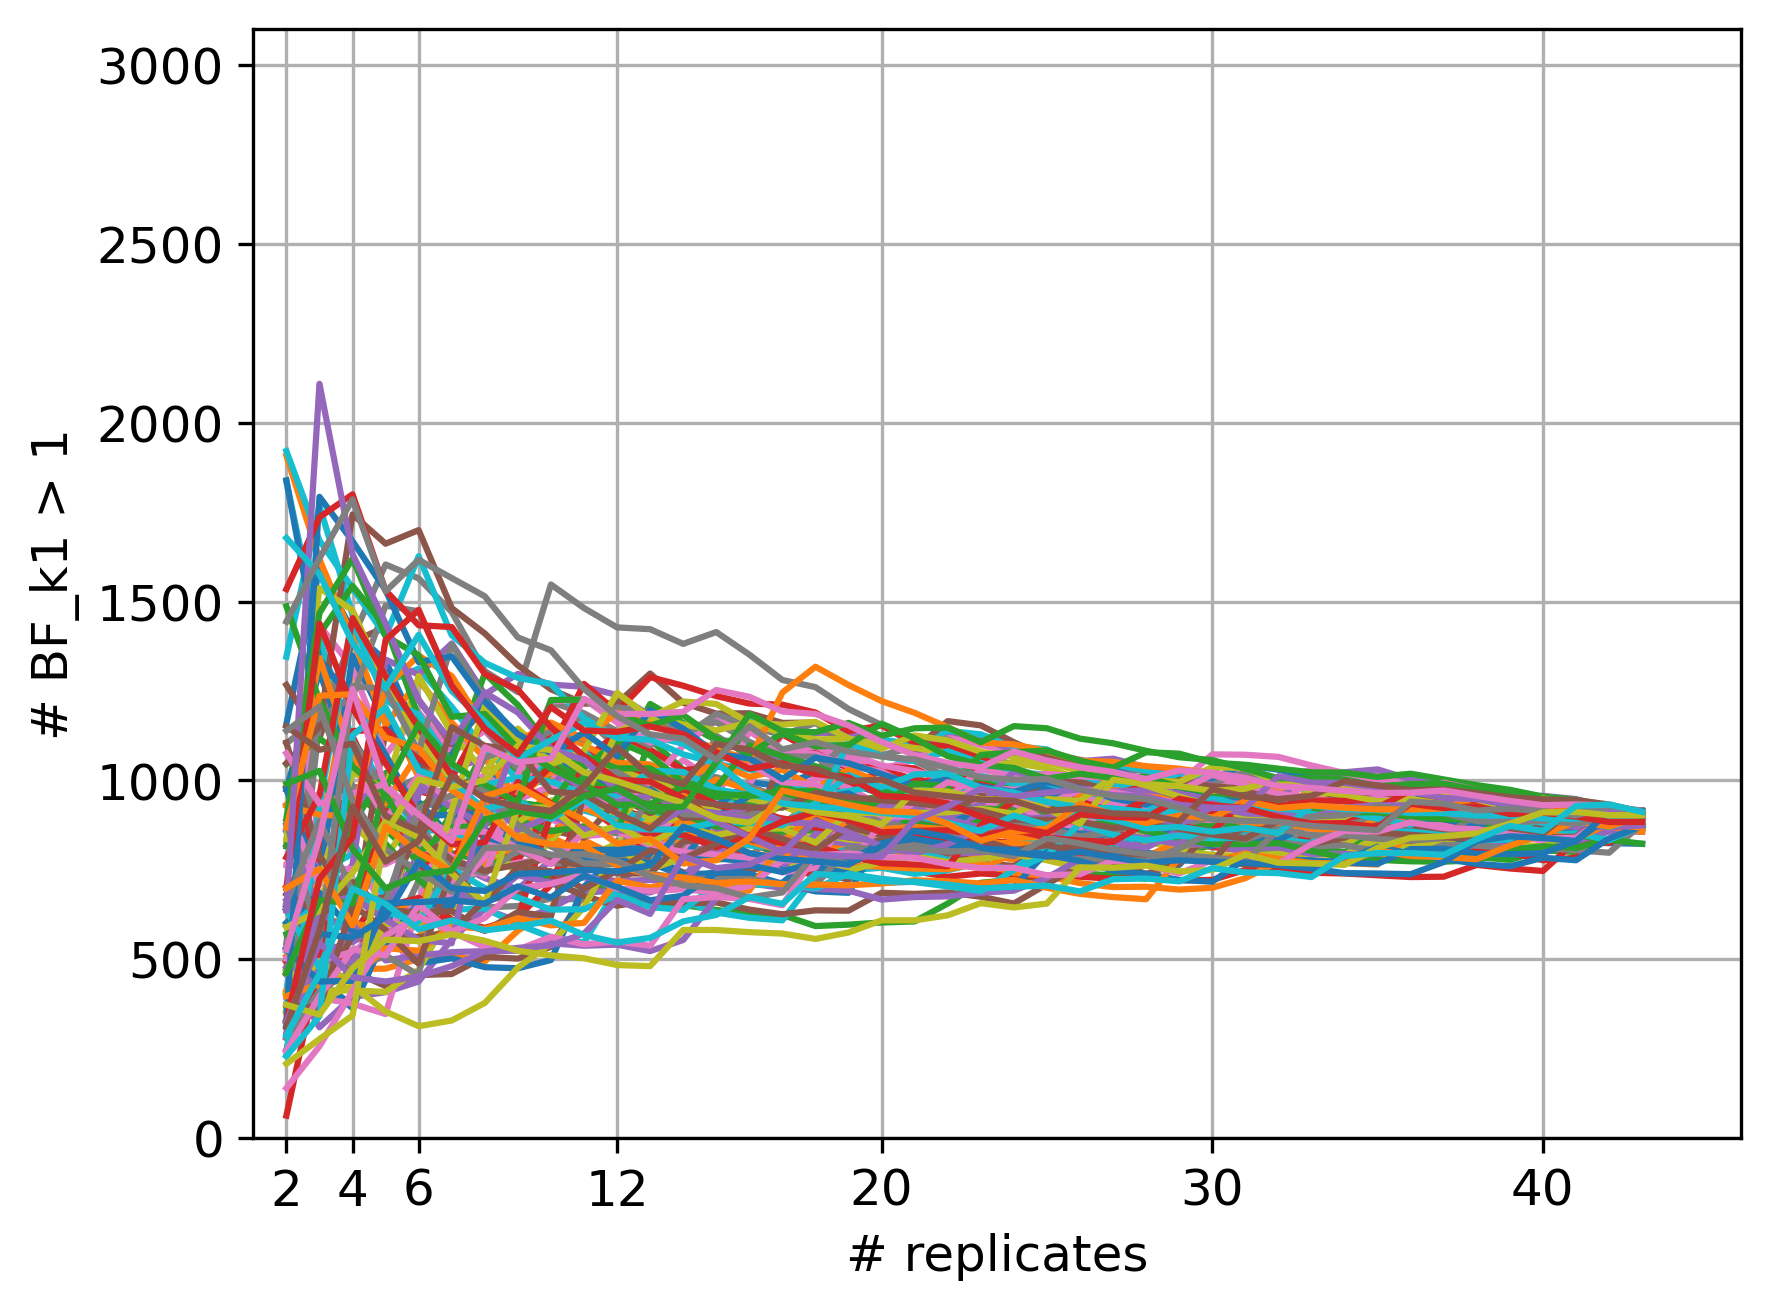

In [15]:
# Create the plot
ax = Snf2_cons_it.plot(legend=False, grid=True,
                      xlabel='# replicates',
                      ylabel='# BF_k1 > 1', fontsize=12)

# Set axis limits
ax.set_xlim(-1, 44)  # Set x-axis limits (adjust as needed)
ax.set_ylim(0, 3100)  # Set y-axis limits based on your data

# Set axis labels with increased font size
ax.set_xlabel('# replicates', fontsize=12)  # Adjust fontsize as needed
ax.set_ylabel('# BF_k1 > 1', fontsize=12)  # Adjust fontsize as needed

# Customize x-ticks and increase font size
ax.set_xticks([0, 2, 4, 10, 18, 28, 38])
ax.set_xticklabels(['2', '4', '6', '12', '20', '30', '40'], fontsize=12)  # Adjust fontsize as needed



# Show the plot
plt.show()

In [16]:
# Checking for intersections and unions in Snf2_CIG

# Convert each inner list to a set
sets = [set(lst) for lst in Snf2_CIG]

print('# genes with BF_k1 > 1 for all replicates throughout the iterations')
for lst in Snf2_CIG:
    print(len(lst))

# Find the intersection of all sets
Snf2_intersection = set.intersection(*sets)

# Print the Snf2_intersection
print('intersection: ', len(Snf2_intersection))

# Find the union of all sets
Snf2_union = set.union(*sets)

# Print the union
print('union: ', len(Snf2_union))


# genes with BF_k1 > 1 for all replicates throughout the iterations
906
857
874
915
907
911
898
900
894
905
823
912
912
874
912
914
912
874
916
906
895
905
907
910
857
912
911
901
902
868
879
857
901
913
915
872
889
872
873
912
910
912
874
912
895
913
914
879
894
873
874
895
823
889
916
905
872
911
906
874
873
889
906
912
905
913
907
910
897
896
897
868
913
895
874
905
911
912
912
901
897
901
905
910
912
914
895
894
914
902
915
901
901
884
907
912
912
912
903
912
intersection:  757
union:  922


In [17]:
# Checking for intersections and unions in WT_CIG

# Convert each inner list to a set
sets = [set(lst) for lst in WT_CIG]

print('# genes with BF_k1 > 1 for all replicates throughout the iterations')
for lst in WT_CIG:
    print(len(lst))

# Find the intersection of all sets
WT_intersection = set.intersection(*sets)

# Print the WT_intersection
print('intersection: ', len(WT_intersection))

# Find the union of all sets
WT_union = set.union(*sets)

# Print the union
print('union: ', len(WT_union))


# genes with BF_k1 > 1 for all replicates throughout the iterations
1596
1608
1610
1598
1602
1608
1611
1581
1580
1618
1610
1608
1608
1623
1612
1596
1572
1598
1602
1505
1596
1601
1596
1610
1551
1572
1551
1611
1615
1601
1610
1559
1610
1594
1598
1612
1505
1607
1606
1580
1548
1615
1602
1604
1606
1551
1596
1605
1580
1603
1580
1559
1581
1598
1580
1610
1610
1608
1608
1598
1607
1581
1610
1623
1551
1618
1617
1608
1559
1607
1605
1572
1603
1610
1505
1606
1602
1611
1580
1505
1594
1618
1580
1606
1604
1596
1606
1623
1597
1618
1604
1598
1611
1623
1618
1618
1618
1604
1572
1598
intersection:  1422
union:  1633


In [18]:
# importing bayexpress results to explore the CIGs

RALL_bayexpress = pd.read_csv('DGE_results/RALL_bayexpress.csv').iloc[:,1:].rename(columns={'genes': "locus_name"})

RALL_bayexpress

,locus_name,BF_21,FC
0,15S_rRNA,-3.710645,0.274047
1,21S_rRNA,-1.302642,0.147177
2,HRA1,-5.206545,-0.564787
3,ICR1,76.746125,0.504048
4,LSR1,0.451012,0.120243
...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839
7122,tY(GUA)M1,-7.406574,0.022303
7123,tY(GUA)M2,-7.727890,0.183767
7124,tY(GUA)O,-7.622253,0.347266


In [19]:
# let's see what those CIGs are

display(RALL_bayexpress.iloc[list(WT_union)]) 
display(RALL_bayexpress.iloc[list(Snf2_union)])

# hmm interesting

,locus_name,BF_21,FC
1,21S_rRNA,-1.302642,0.147177
4,LSR1,0.451012,0.120243
41,RDN5-1,13.774601,0.316040
46,RDN5-6,15.230943,0.469612
56,RUF5-1,-1.191579,0.080133
...,...,...,...
6731,YPR191W,218.989419,0.279871
6745,YPR204W,814.266672,0.541523
6752,snR17a,7.383833,0.329308
6761,snR30,20.556922,0.159709


,locus_name,BF_21,FC
0,15S_rRNA,-3.710645,0.274047
1,21S_rRNA,-1.302642,0.147177
4,LSR1,0.451012,0.120243
4100,YLL021W,891.706282,0.521375
4103,YLL024C,9077.546061,-0.490986
...,...,...,...
4063,YKR094C,158.639355,-0.086969
4064,YKR095W,1141.755429,0.533953
4068,YKR098C,843.035626,0.732050
4085,YLL008W,1202.946112,-0.845752


In [20]:
# let's see what CIGs have BF_21 > 1

# out of 1633
display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1])

# out of 922
display(RALL_bayexpress.iloc[list(Snf2_union)].loc[RALL_bayexpress.BF_21 > 1])

# hmm interesting

,locus_name,BF_21,FC
41,RDN5-1,13.774601,0.316040
46,RDN5-6,15.230943,0.469612
58,SCR1,10.530223,0.125605
59,SRG1,365.733360,-0.939803
60,TLC1,777.763124,0.472738
...,...,...,...
6731,YPR191W,218.989419,0.279871
6745,YPR204W,814.266672,0.541523
6752,snR17a,7.383833,0.329308
6761,snR30,20.556922,0.159709


,locus_name,BF_21,FC
4100,YLL021W,891.706282,0.521375
4103,YLL024C,9077.546061,-0.490986
4105,YLL026W,6986.693811,-0.641283
4118,YLL039C,533.296466,0.257212
4120,YLL041C,3.231386,0.060734
...,...,...,...
4060,YKR091W,757.902699,-0.557891
4063,YKR094C,158.639355,-0.086969
4064,YKR095W,1141.755429,0.533953
4068,YKR098C,843.035626,0.732050


In [21]:
# calculating average <q> for each additional replicate for the plots


def get_avq(data):
    output = pd.DataFrame({'genes': data.genes})
    for k in range(2,len(data.columns)):

        N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))

        n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)
        
        output[f'{k-1}'] = (n_i + 1) / (N+2)

    return output


# WT_yeast = get_BF_21(WT_yeast)

# display(WT_yeast)

# Snf2_yeast = get_BF_21(Snf2_yeast)

# display(Snf2_yeast)

WT_yeast_avq = get_avq(WT_yeast)

display(WT_yeast_avq)


Snf2_yeast_avq = get_avq(Snf2_yeast)

display(Snf2_yeast_avq)


WT_yeast_avq.to_csv('WT_yeast_avq.csv')
Snf2_yeast_avq.to_csv('Snf2_yeast_avq.csv')

,genes,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,15S_rRNA,5.030082e-07,1.082671e-06,2.266838e-06,1.757651e-06,1.936241e-06,1.611843e-06,1.414441e-06,1.262933e-06,1.211224e-06,...,1.904640e-06,1.853748e-06,1.946728e-06,1.911901e-06,1.879292e-06,1.874652e-06,1.864698e-06,1.802844e-06,1.838121e-06,1.808986e-06
1,21S_rRNA,3.521057e-06,7.001270e-06,9.757261e-06,9.667083e-06,1.097203e-05,9.352440e-06,8.599160e-06,7.869044e-06,7.712282e-06,...,1.143895e-05,1.116937e-05,1.165616e-05,1.143130e-05,1.125617e-05,1.124791e-05,1.114460e-05,1.082007e-05,1.111147e-05,1.103367e-05
2,HRA1,6.706775e-07,4.330683e-07,3.942327e-07,3.254910e-07,3.356151e-07,3.373626e-07,3.536103e-07,3.053245e-07,3.213451e-07,...,3.409082e-07,3.498319e-07,3.457776e-07,3.543033e-07,3.621552e-07,3.608785e-07,3.579971e-07,3.515545e-07,3.605317e-07,3.538079e-07
3,ICR1,1.274287e-05,1.436343e-05,1.507940e-05,1.507023e-05,1.448308e-05,1.510635e-05,1.486771e-05,1.450291e-05,1.438637e-05,...,1.402170e-05,1.395360e-05,1.399016e-05,1.398161e-05,1.403270e-05,1.409661e-05,1.399302e-05,1.393298e-05,1.398095e-05,1.403248e-05
4,LSR1,1.022783e-05,1.616788e-05,2.252055e-05,2.018044e-05,2.098885e-05,2.226593e-05,2.221316e-05,2.034571e-05,2.072676e-05,...,2.320770e-05,2.282563e-05,2.321551e-05,2.321690e-05,2.314857e-05,2.302277e-05,2.269390e-05,2.223207e-05,2.225545e-05,2.218147e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.676694e-07,1.443561e-07,9.855819e-08,6.509820e-08,5.163308e-08,7.496946e-08,6.429279e-08,5.551354e-08,4.943770e-08,...,1.852762e-08,1.803257e-08,1.728888e-08,1.671242e-08,1.631330e-08,1.596807e-08,1.556509e-08,1.502370e-08,1.477589e-08,1.426645e-08
7122,tY(GUA)M1,1.676694e-07,7.217804e-08,9.855819e-08,9.764730e-08,1.032662e-07,9.371182e-08,8.036599e-08,6.939192e-08,7.415655e-08,...,4.817182e-08,4.688468e-08,4.840887e-08,5.013727e-08,4.893989e-08,5.109783e-08,4.980829e-08,4.807583e-08,4.728285e-08,4.850592e-08
7123,tY(GUA)M2,1.676694e-07,7.217804e-08,9.855819e-08,6.509820e-08,5.163308e-08,3.748473e-08,4.821959e-08,4.163515e-08,3.707828e-08,...,1.482210e-08,1.442606e-08,1.383111e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08
7124,tY(GUA)O,1.676694e-07,7.217804e-08,4.927909e-08,3.254910e-08,2.581654e-08,1.874236e-08,3.214639e-08,2.775677e-08,2.471885e-08,...,1.111657e-08,1.081954e-08,1.037333e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08


,genes,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,15S_rRNA,4.888009e-07,3.699162e-07,4.332702e-07,4.431870e-07,1.392500e-06,1.178058e-06,1.093068e-06,9.750276e-07,1.354988e-06,...,2.247482e-06,2.162239e-06,2.153404e-06,2.107489e-06,2.068077e-06,2.252873e-06,2.219721e-06,2.264491e-06,2.219710e-06,2.184992e-06
1,21S_rRNA,3.128326e-06,2.642259e-06,2.635727e-06,3.050169e-06,1.045480e-05,8.800790e-06,8.213191e-06,7.299531e-06,8.343876e-06,...,1.195357e-05,1.158432e-05,1.153281e-05,1.139055e-05,1.119966e-05,1.252824e-05,1.236465e-05,1.273472e-05,1.249908e-05,1.232996e-05
2,HRA1,5.865611e-07,3.699162e-07,3.610585e-07,2.867680e-07,2.873412e-07,2.425414e-07,2.732670e-07,2.898731e-07,2.614890e-07,...,2.475201e-07,2.514231e-07,2.603689e-07,2.526609e-07,2.534122e-07,2.465408e-07,2.432571e-07,2.434937e-07,2.431111e-07,2.376114e-07
3,ICR1,2.013860e-05,2.124376e-05,2.213289e-05,2.255039e-05,2.192635e-05,2.195000e-05,2.166400e-05,2.130567e-05,2.095478e-05,...,1.977850e-05,1.973357e-05,1.970839e-05,1.967188e-05,1.975450e-05,1.979128e-05,1.981993e-05,1.979874e-05,1.982148e-05,1.987671e-05
4,LSR1,2.062740e-05,1.659338e-05,1.707807e-05,1.910918e-05,2.278837e-05,2.311074e-05,2.170954e-05,2.058099e-05,2.169170e-05,...,2.351111e-05,2.317493e-05,2.318508e-05,2.295350e-05,2.265855e-05,2.414683e-05,2.418197e-05,2.428173e-05,2.402572e-05,2.406074e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.955204e-07,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,4.554450e-08,3.952815e-08,3.565759e-08,...,1.320107e-08,1.571395e-08,1.837898e-08,1.783489e-08,1.747671e-08,1.700282e-08,1.658571e-08,1.623291e-08,2.114009e-08,2.324459e-08
7122,tY(GUA)M1,9.776019e-08,5.284517e-08,7.221170e-08,5.213964e-08,8.841268e-08,6.929756e-08,6.072600e-08,5.270420e-08,4.754345e-08,...,4.950401e-08,5.028463e-08,5.207378e-08,5.350466e-08,5.243012e-08,5.100845e-08,4.975714e-08,4.869873e-08,4.756521e-08,4.648918e-08
7123,tY(GUA)M2,9.776019e-08,5.284517e-08,3.610585e-08,2.606982e-08,2.210317e-08,1.732439e-08,1.518150e-08,1.317605e-08,1.188586e-08,...,1.650134e-08,1.571395e-08,1.531582e-08,1.486241e-08,1.456392e-08,1.416901e-08,1.382143e-08,1.352743e-08,1.321256e-08,1.291366e-08
7124,tY(GUA)O,9.776019e-08,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,3.036300e-08,2.635210e-08,3.565759e-08,...,1.980160e-08,1.885673e-08,2.144214e-08,2.080737e-08,2.038949e-08,1.983662e-08,1.935000e-08,1.893840e-08,1.849758e-08,1.807913e-08


In [22]:
RALL_bayexpress['BF_k1_WT'] = get_BF_k1(WT_yeast.iloc[:,1:])
RALL_bayexpress['CIG_WT'] = RALL_bayexpress.index.isin(WT_union)

RALL_bayexpress['BF_k1_Snf2'] = get_BF_k1(Snf2_yeast.iloc[:,1:])
RALL_bayexpress['CIG_Snf2'] = RALL_bayexpress.index.isin(Snf2_union)

display(RALL_bayexpress)
RALL_bayexpress.to_csv('RALL_bayexpress.csv')

,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


# How many genes would be marked as not consistent?

In [23]:
display((RALL_bayexpress.BF_k1_WT > 1).describe())

display((RALL_bayexpress.BF_k1_Snf2 > 1).describe())

display(((RALL_bayexpress.BF_k1_WT > 1) & (RALL_bayexpress.BF_k1_Snf2 > 1)).describe())

display(((RALL_bayexpress.BF_k1_WT > 1) | (RALL_bayexpress.BF_k1_Snf2 > 1)).describe())



count      7126
unique        2
top       False
freq       5524
Name: BF_k1_WT, dtype: object

count      7126
unique        2
top       False
freq       6223
Name: BF_k1_Snf2, dtype: object

count      7126
unique        2
top       False
freq       6359
dtype: object

count      7126
unique        2
top       False
freq       5388
dtype: object

In [24]:
WT_yeast_q = pd.DataFrame({})

for col in WT_yeast.columns[1:43]:

    WT_yeast_q[col+'_q'] = (WT_yeast[col]+1) / (sum(WT_yeast[col])+2)

WT_yeast_q.to_csv('WT_yeast_q.csv')

WT_yeast_q

,30_q,21_q,6_q,32_q,38_q,1_q,4_q,9_q,40_q,28_q,...,29_q,22_q,5_q,15_q,27_q,3_q,19_q,13_q,17_q,39_q
0,3.455352e-06,2.093998e-06,8.207817e-07,1.528210e-06,1.603579e-06,5.030082e-07,8.628760e-07,9.034018e-07,4.120753e-06,9.173822e-07,...,1.578264e-06,7.542872e-07,2.745867e-06,5.250010e-07,5.808502e-07,4.970523e-06,2.573225e-06,1.651220e-06,3.619449e-06,1.727728e-07
1,1.307024e-05,1.439624e-05,5.129886e-06,1.000283e-05,7.277780e-06,3.521057e-06,9.587511e-06,6.549663e-06,2.866611e-05,1.177307e-05,...,1.167915e-05,5.908583e-06,1.610077e-05,2.756255e-06,4.065951e-06,1.584354e-05,9.649594e-06,4.513335e-06,1.670515e-05,1.900501e-06
2,4.506981e-07,6.543744e-07,4.103909e-07,2.778564e-07,3.700566e-07,6.706775e-07,2.876253e-07,5.646261e-07,1.074979e-06,3.057941e-07,...,6.313054e-07,7.542872e-07,4.992486e-07,1.312503e-07,9.293603e-07,4.659866e-07,4.288709e-07,3.302440e-07,9.744670e-07,2.591592e-07
3,1.442234e-05,1.518149e-05,1.682602e-05,9.030333e-06,1.011488e-05,1.274287e-05,1.514827e-05,1.355103e-05,1.702050e-05,1.284335e-05,...,1.188959e-05,1.470860e-05,1.235640e-05,1.509378e-05,1.556678e-05,1.677552e-05,1.275891e-05,1.398033e-05,1.809724e-05,1.235325e-05
4,3.365212e-05,2.970860e-05,2.571783e-05,7.779979e-06,1.011488e-05,1.022783e-05,1.572352e-05,2.394015e-05,2.382870e-05,1.238466e-05,...,2.788266e-05,1.760003e-05,2.421356e-05,1.312503e-05,3.090123e-05,3.634695e-05,1.254447e-05,2.201627e-05,2.881638e-05,9.502503e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1.502327e-07,1.308749e-07,2.051954e-07,1.389282e-07,1.233522e-07,1.676694e-07,9.587511e-08,1.129252e-07,1.791632e-07,1.528970e-07,...,1.052176e-07,1.257145e-07,1.248121e-07,1.312503e-07,1.161700e-07,1.553289e-07,1.072177e-07,1.100813e-07,1.392096e-07,8.638639e-08
7122,1.502327e-07,2.617497e-07,1.367970e-07,1.389282e-07,1.233522e-07,1.676694e-07,1.917502e-07,2.258505e-07,1.791632e-07,1.528970e-07,...,1.052176e-07,2.514291e-07,2.496243e-07,1.312503e-07,2.323401e-07,3.106577e-07,1.072177e-07,1.100813e-07,4.176287e-07,8.638639e-08
7123,1.502327e-07,1.308749e-07,6.839848e-08,1.389282e-07,1.233522e-07,1.676694e-07,9.587511e-08,1.129252e-07,1.791632e-07,1.528970e-07,...,1.052176e-07,1.257145e-07,1.248121e-07,1.312503e-07,2.323401e-07,3.106577e-07,1.072177e-07,1.100813e-07,1.392096e-07,8.638639e-08
7124,1.502327e-07,1.308749e-07,6.839848e-08,1.389282e-07,1.233522e-07,1.676694e-07,9.587511e-08,1.129252e-07,1.791632e-07,1.528970e-07,...,1.052176e-07,2.514291e-07,1.248121e-07,1.312503e-07,1.161700e-07,1.553289e-07,1.072177e-07,1.100813e-07,1.392096e-07,8.638639e-08


In [25]:
Snf2_yeast_q = pd.DataFrame({})

for col in Snf2_yeast.columns[1:43]:

    Snf2_yeast_q[col+'_q'] = (Snf2_yeast[col]+1) / (sum(Snf2_yeast[col])+2)

Snf2_yeast_q.to_csv('Snf2_yeast_q.csv')

Snf2_yeast_q

,38_q,18_q,2_q,15_q,12_q,10_q,11_q,23_q,17_q,24_q,...,42_q,16_q,28_q,21_q,30_q,43_q,32_q,22_q,26_q,13_q
0,2.900728e-07,6.587695e-07,3.450619e-07,5.007454e-06,2.240068e-05,8.074703e-07,6.755117e-07,9.171568e-07,1.691104e-06,1.205007e-06,...,4.541140e-07,2.273210e-06,7.889508e-07,1.215388e-06,1.443493e-06,7.991772e-07,4.463240e-07,7.894240e-06,9.023679e-07,9.497976e-07
1,2.030510e-06,3.293847e-06,2.185392e-06,3.848866e-05,8.024281e-05,6.560696e-06,3.242456e-06,7.642973e-06,8.314594e-06,7.832543e-06,...,2.724684e-06,9.930340e-06,6.048623e-06,5.401724e-06,6.538174e-06,5.137568e-06,3.459011e-06,3.114636e-05,7.863492e-06,4.748988e-06
2,4.351093e-07,2.195898e-07,2.300412e-07,2.945561e-07,2.103350e-07,4.037352e-07,4.053070e-07,1.019063e-07,2.818506e-07,6.025033e-07,...,3.405855e-07,4.785706e-07,6.574590e-07,1.350431e-07,3.396454e-07,1.141682e-07,3.347430e-07,4.305949e-07,2.578194e-07,2.374494e-07
3,2.393101e-05,1.734760e-05,2.265906e-05,2.002981e-05,2.187484e-05,1.937929e-05,2.202168e-05,2.201176e-05,1.860214e-05,1.491196e-05,...,2.088925e-05,2.141604e-05,1.354366e-05,2.133681e-05,2.037873e-05,2.237696e-05,1.305498e-05,1.901794e-05,2.797341e-05,1.733381e-05
4,8.412112e-06,1.592026e-05,1.196214e-05,4.320156e-05,9.423009e-05,1.594754e-05,2.418332e-05,1.569357e-05,1.719289e-05,1.551446e-05,...,1.339636e-05,2.141604e-05,1.078233e-05,2.376759e-05,2.606779e-05,2.568784e-05,9.707547e-06,3.695939e-05,1.740281e-05,7.242207e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1.450364e-07,1.097949e-07,1.150206e-07,9.818537e-08,1.051675e-07,1.009338e-07,1.351023e-07,1.019063e-07,1.409253e-07,1.506258e-07,...,3.405855e-07,1.196427e-07,1.314918e-07,1.350431e-07,8.491135e-08,2.283363e-07,1.115810e-07,7.176581e-08,2.578194e-07,1.187247e-07
7122,1.450364e-07,1.097949e-07,1.150206e-07,1.963707e-07,1.051675e-07,1.009338e-07,1.351023e-07,2.038126e-07,1.409253e-07,1.506258e-07,...,1.135285e-07,1.196427e-07,2.629836e-07,4.051293e-07,8.491135e-08,1.141682e-07,1.115810e-07,1.435316e-07,1.289097e-07,1.187247e-07
7123,1.450364e-07,1.097949e-07,1.150206e-07,1.963707e-07,1.051675e-07,1.009338e-07,2.702047e-07,1.019063e-07,1.409253e-07,1.506258e-07,...,1.135285e-07,1.196427e-07,1.314918e-07,1.350431e-07,8.491135e-08,1.141682e-07,1.115810e-07,7.176581e-08,1.289097e-07,1.187247e-07
7124,1.450364e-07,3.293847e-07,2.300412e-07,9.818537e-08,1.051675e-07,1.009338e-07,1.351023e-07,1.019063e-07,1.409253e-07,1.506258e-07,...,1.135285e-07,1.196427e-07,1.314918e-07,1.350431e-07,8.491135e-08,1.141682e-07,1.115810e-07,7.176581e-08,1.289097e-07,1.187247e-07


In [26]:
RALL_bayexpress

,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


In [27]:
# WT union CIG, examples

display(WT_yeast.iloc[list(WT_union)][:5])
display(Snf2_yeast.iloc[list(WT_union)][:5])

print(list(WT_yeast.iloc[list(WT_union)][:5].genes))


,genes,30,21,6,32,38,1,4,9,40,...,29,22,5,15,27,3,19,13,17,39
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
41,RDN5-1,50,42,105,48,36,80,37,50,49,...,28,184,40,48,27,107,63,17,201,29
46,RDN5-6,21,11,71,7,16,15,16,25,23,...,8,95,14,9,24,42,5,4,106,18
56,RUF5-1,159,404,313,454,457,732,297,155,247,...,138,380,326,197,554,102,318,198,351,350


,genes,38,18,2,15,12,10,11,23,17,...,28,21,30,43,32,22,26,13,33,20
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
41,RDN5-1,49,40,48,79,175,77,33,34,134,...,96,103,72,36,326,50,53,43,55,58
46,RDN5-6,18,14,11,31,84,21,18,7,46,...,49,47,27,8,212,10,35,13,20,26
56,RUF5-1,472,217,267,409,291,619,301,292,196,...,499,271,366,225,376,491,385,373,541,375


['21S_rRNA', 'LSR1', 'RDN5-1', 'RDN5-6', 'RUF5-1']


In [28]:
# WT union CIGs, examples

# let's see what CIGs have BF_21 > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5])

# hmm interesting

display(WT_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5].index])
display(Snf2_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5].index])

display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[:5].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
3425,YJL098W,1.025525,-0.091190,113.153322,True,-129.167778,False
5742,YOL115W,1.025888,0.075491,57.474774,True,-151.068325,False
4515,YLR333C,1.447678,-0.029229,196.567132,True,97.113080,True
5822,YOR021C,1.559348,0.053039,92.677944,True,-118.214175,False
1540,YDR408C,2.105490,-0.049501,-6.324689,True,-62.712539,False


,genes,30,21,6,32,38,1,4,9,40,...,29,22,5,15,27,3,19,13,17,39
3425,YJL098W,191,444,189,274,482,835,377,351,333,...,425,319,600,276,190,276,740,141,675,209
5742,YOL115W,264,616,398,517,650,1168,568,430,505,...,422,490,739,394,326,292,794,277,827,350
4515,YLR333C,1998,3860,2924,4519,3708,6447,3511,3448,4006,...,3045,4715,4487,2930,2862,2345,4573,2453,5339,3408
5822,YOR021C,613,1116,776,1198,1241,2370,1216,1055,1132,...,931,1311,1572,964,616,765,1750,593,1737,959
1540,YDR408C,1267,1172,950,1814,1178,2045,1383,1651,1693,...,1096,2000,1386,1014,1127,1575,1944,888,1873,1428


,genes,38,18,2,15,12,10,11,23,17,...,28,21,30,43,32,22,26,13,33,20
3425,YJL098W,422,275,270,406,206,479,388,422,328,...,632,355,483,251,318,441,302,344,430,272
5742,YOL115W,631,462,529,677,386,884,442,632,568,...,996,523,574,420,580,568,518,596,664,599
4515,YLR333C,4120,3430,3463,4082,2873,4475,2786,4668,4097,...,5687,3221,3619,2557,4038,3758,3569,3820,3803,3577
5822,YOR021C,1312,1060,1072,1540,870,1717,1025,1434,1224,...,2116,1146,1205,805,1134,1341,1011,1206,1316,945
1540,YDR408C,1539,1440,1308,1575,1285,2026,1449,1278,1144,...,2456,1158,1872,1210,1756,1399,1320,1310,1314,1219


['YJL098W', 'YOL115W', 'YLR333C', 'YOR021C', 'YDR408C']

In [29]:
# WT union CIGs, examples

# let's see what CIGs have BF_21 > 1

display(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:])

# hmm interesting

display(WT_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:].index])
display(Snf2_yeast.iloc[RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:].index])

display(list(RALL_bayexpress.iloc[(list(WT_union))].loc[RALL_bayexpress.BF_21 > 1].sort_values(by='BF_21')[-5:].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
2639,YGR192C,101517.928512,-0.456369,52530.251796,True,23438.201797,True
6209,YOR383C,118338.158193,1.478789,1920.042323,True,10685.558763,True
1465,YDR342C,151255.899622,-2.643644,21822.485016,True,2076.867472,True
3012,YHR174W,205922.035360,-0.847059,13841.417356,True,7918.998188,True
1175,YDR077W,341558.582413,-3.175344,13017.391966,True,1422.483953,True


,genes,30,21,6,32,38,1,4,9,40,...,29,22,5,15,27,3,19,13,17,39
2639,YGR192C,188825,196804,172119,328674,225435,357247,261535,343455,268394,...,246621,358116,278531,209062,191739,318398,338511,169415,348635,244192
6209,YOR383C,12713,11599,10437,18694,10940,21254,11928,20445,14405,...,11286,21585,17444,12251,10503,16357,18733,8162,19044,14295
1465,YDR342C,20257,15357,26120,29846,13135,29153,16334,36916,24772,...,13346,47023,14585,25504,23590,25281,20870,22192,24641,22226
3012,YHR174W,129581,133346,109168,207147,145674,268592,196925,211933,189789,...,157763,235246,191877,136675,120124,195917,243868,107856,237778,158290
1175,YDR077W,35563,31153,31852,54048,30594,65771,39147,58449,45629,...,37196,63004,38304,36697,33838,54827,54371,26658,50782,45913


,genes,38,18,2,15,12,10,11,23,17,...,28,21,30,43,32,22,26,13,33,20
2639,YGR192C,205731,199983,210124,204494,158243,242692,209080,210681,178901,...,323457,180745,239701,163673,219417,167478,177709,170179,160083,142435
6209,YOR383C,36728,39745,40978,49945,33631,56767,31049,52374,33049,...,60183,37108,50351,34465,46750,37686,43105,47984,34235,29763
1465,YDR342C,6160,4351,3760,5849,2707,8347,4344,2973,2201,...,7219,4147,5938,2552,3313,4676,2446,2606,4178,1935
3012,YHR174W,107206,100381,112005,104187,76754,126571,101232,105342,114602,...,165739,86105,112391,81618,106975,86521,85779,95411,83560,75125
1175,YDR077W,5978,5813,4679,5852,4049,9193,4939,4684,2002,...,9285,5125,7021,4165,5594,5013,4016,3755,4674,3275


['YGR192C', 'YOR383C', 'YDR342C', 'YHR174W', 'YDR077W']

In [30]:
# Snf2 union CIGs, examples

display(WT_yeast.iloc[list(Snf2_union)][:5])
display(Snf2_yeast.iloc[list(Snf2_union)][:5])

print(list(Snf2_yeast.iloc[list(Snf2_union)][:5].genes))


,genes,30,21,6,32,38,1,4,9,40,...,29,22,5,15,27,3,19,13,17,39
0,15S_rRNA,2,12,31,8,21,11,2,3,7,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
4100,YLL021W,750,1190,759,1284,1172,2758,1282,1194,1057,...,1067,1624,1648,1073,742,902,1868,606,1943,1076
4103,YLL024C,13940,16062,13989,24924,15680,28293,20802,24091,19080,...,17245,27935,22996,17317,16363,19475,24881,13493,25858,19777


,genes,38,18,2,15,12,10,11,23,17,...,28,21,30,43,32,22,26,13,33,20
0,15S_rRNA,4,2,5,5,46,5,4,2,40,...,7,15,6,1,85,8,34,3,6,3
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
4100,YLL021W,1921,1652,1855,2319,1259,2869,1387,1922,1951,...,3413,1731,1890,1437,1780,1846,1514,1997,1825,1484
4103,YLL024C,14168,15026,15877,15309,11377,15925,11809,19464,17624,...,23070,12714,13424,11915,15851,12510,13526,16627,11588,12153


['15S_rRNA', '21S_rRNA', 'LSR1', 'YLL021W', 'YLL024C']


In [31]:
# exporting this table to compare with WT-WT control experiments

RALL_bayexpress.iloc[(list(WT_union))].to_csv('RALL_bayexpress_CIG_WT_union.csv')